In [26]:
# Installing the necassary package to bring in the database

!pip install psycopg2-binary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
import psycopg2
import pandas as pd

# Connecting this colab file to our database running on AWS RDS
conn = psycopg2.connect(
    host="database-1.cwyrmxcmisvd.us-east-2.rds.amazonaws.com",
    database="postgres",
    user="postgres",
    password="ILoveIntex!"
)

# These are all of the tables in the database and the columns in each table that I started with to be features to determine wrapping

#burialmain (sex, headdirection, depth, adultsubadult, facebundles, wrapping, area, length, ageatdeath)
#yarnmanipulation (thickness, angle, manipulation, material, count, component, direction)
#textilefunction (value)
#dimension (dimensiontype)
#decoration (value)
#structure (value)
#color (value)
#textile (locale)   

# Create a cursor object
cur2 = conn.cursor()

# Cursor object allows me to execute SQL queries. I created a massive query here that joins all of the tables I wanted to use together
query = "SELECT * FROM burialmain bm "
query += "inner JOIN burialmain_textile bmt ON bm.id = bmt.main$burialmainid " 
query += "inner JOIN textile txt on bmt.main$textileid = txt.id "
query += "LEFT JOIN textilefunction_textile tft on tft.main$textileid = txt.id "
query += "LEFT JOIN textilefunction tf on tf.textilefunctionid = tft.main$textilefunctionid "
query += "LEFT JOIN color_textile ct on txt.id = ct.main$textileid "
query += "LEFT JOIN color co on ct.main$colorid = co.id "
query += "LEFT JOIN decoration_textile dt ON txt.id = dt.main$textileid "
query += "LEFT JOIN decoration d ON dt.main$decorationid = d.id "
query += "LEFT JOIN yarnmanipulation_textile yt ON txt.id = yt.main$textileid "
query += "LEFT JOIN yarnmanipulation y ON yt.main$yarnmanipulationid = y.id "
query += "LEFT JOIN dimension_textile dmt ON txt.id = dmt.main$textileid "
query += "LEFT JOIN dimension dm ON dmt.main$dimensionid = dm.id "
query += "LEFT JOIN structure_textile st ON txt.id = st.main$textileid "
query += "LEFT JOIN structure s ON st.main$structureid = s.id"

cur2.execute(query)

# Fetches the results
results = cur2.fetchall()

#Loads all this one big table into a dataframe
df = pd.DataFrame(results, columns=[desc[0] for desc in cur2.description])

df.columns

Index(['id', 'squarenorthsouth', 'headdirection', 'sex', 'northsouth', 'depth',
       'eastwest', 'adultsubadult', 'facebundles', 'southtohead',
       'preservation', 'fieldbookpage', 'squareeastwest', 'goods', 'text',
       'wrapping', 'haircolor', 'westtohead', 'samplescollected', 'area',
       'burialid', 'length', 'burialnumber', 'dataexpertinitials',
       'westtofeet', 'ageatdeath', 'southtofeet', 'excavationrecorder',
       'photos', 'hair', 'burialmaterials', 'dateofexcavation',
       'fieldbookexcavationyear', 'clusternumber', 'shaftnumber',
       'main$burialmainid', 'main$textileid', 'id', 'locale', 'textileid',
       'description', 'burialnumber', 'estimatedperiod', 'sampledate',
       'photographeddate', 'direction', 'main$textilefunctionid',
       'main$textileid', 'id', 'value', 'textilefunctionid', 'main$colorid',
       'main$textileid', 'id', 'value', 'colorid', 'main$decorationid',
       'main$textileid', 'id', 'decorationid', 'value',
       'main$yarnma

In [28]:
# I rename all of the id files so I can pick and choose which id columns I want to drop later

df.columns.values[0] = 'id'
df.columns.values[37] = 'id2'
df.columns.values[48] = 'id3'
df.columns.values[53] = 'id4'
df.columns.values[58] = 'id5'
df.columns.values[63] = 'id6'
df.columns.values[75] = 'id7'
df.columns.values[81] = 'id8'
df.columns.values[49] = 'value1'
df.columns.values[54] = 'value2'
df.columns.values[60] = 'value3'
df.columns.values[77] = 'value4'
df.columns.values[82] = 'value5'

df.columns

Index(['id', 'squarenorthsouth', 'headdirection', 'sex', 'northsouth', 'depth',
       'eastwest', 'adultsubadult', 'facebundles', 'southtohead',
       'preservation', 'fieldbookpage', 'squareeastwest', 'goods', 'text',
       'wrapping', 'haircolor', 'westtohead', 'samplescollected', 'area',
       'burialid', 'length', 'burialnumber', 'dataexpertinitials',
       'westtofeet', 'ageatdeath', 'southtofeet', 'excavationrecorder',
       'photos', 'hair', 'burialmaterials', 'dateofexcavation',
       'fieldbookexcavationyear', 'clusternumber', 'shaftnumber',
       'main$burialmainid', 'main$textileid', 'id2', 'locale', 'textileid',
       'description', 'burialnumber', 'estimatedperiod', 'sampledate',
       'photographeddate', 'direction', 'main$textilefunctionid',
       'main$textileid', 'id3', 'value1', 'textilefunctionid', 'main$colorid',
       'main$textileid', 'id4', 'value2', 'colorid', 'main$decorationid',
       'main$textileid', 'id5', 'decorationid', 'value3',
       'main

In [29]:
# I drop all of the columns that are irrelevant and that weren't in my original list of columns I made in the comments above

droplist=['id','adultsubadult','sampledate','fieldbookpage','squarenorthsouth','northsouth','eastwest','southtohead','preservation','fieldbookpage','goods','text','haircolor','samplescollected','westtohead','main$burialmainid','squareeastwest','main$textileid',
          'structureid','dimensionid', 'main$structureid','main$textileid', 'id8','main$dimensionid', 'main$textileid','id7','ply','yarnmanipulationid','main$yarnmanipulationid', 'main$textileid', 'id6','colorid', 'main$decorationid','main$textileid', 'id5', 'decorationid','textilefunctionid', 'main$colorid','main$textileid', 'id4','main$textilefunctionid','main$textileid', 'id3','textileid','description', 'burialnumber', 'estimatedperiod', 'sampledate','photographeddate','photos', 'hair', 'burialmaterials', 'dateofexcavation','fieldbookexcavationyear', 'clusternumber', 'shaftnumber','main$burialmainid', 'main$textileid', 'id2','excavationrecorder','southtofeet','westtofeet','dataexpertinitials','burialid','main$colorid','main$textileid','main$decorationid','main$yarnmanipulationid','main$structureid','main$dimensionid',
          'id2','id3','id4','id5','id6','id7','burialnumber','text','clusternumber','description','photographeddate','locale']
df.drop(droplist, axis=1, inplace=True)

# I drop any of the columns that remain that have 40% or more of their data missing

thresh = len(df) * 0.6
df.dropna(thresh=thresh, axis=1, inplace=True)

print(df.dtypes)
df

headdirection    object
sex              object
depth            object
wrapping         object
area             object
length           object
ageatdeath       object
dtype: object


,headdirection,sex,depth,wrapping,area,length,ageatdeath
0,E,,1.6,W,SE,1.64,A
1,W,,1.58,W,SE,1.66,A
2,None,,1.27,W,SE,0.65,
3,W,,0.85,W,SE,1.8,A
4,W,,0.85,W,SE,1.8,A
...,...,...,...,...,...,...,...
302,None,,1.27,W,SE,0.65,
303,W,,1.01,W,SE,1.75,A
304,W,,1.3,W,SE,0.52,I
305,,M,1.6,W,NE,,


In [30]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# I convert the remaining numerical columns to floats

df['depth'] = df['depth'].fillna(0).astype(float)
df['length'] = df['length'].replace('', np.nan).fillna(0).astype(float)

df

,headdirection,sex,depth,wrapping,area,length,ageatdeath
0,E,,1.60,W,SE,1.64,A
1,W,,1.58,W,SE,1.66,A
2,None,,1.27,W,SE,0.65,
3,W,,0.85,W,SE,1.80,A
4,W,,0.85,W,SE,1.80,A
...,...,...,...,...,...,...,...
302,None,,1.27,W,SE,0.65,
303,W,,1.01,W,SE,1.75,A
304,W,,1.30,W,SE,0.52,I
305,,M,1.60,W,NE,0.00,


In [31]:
import numpy as np
import pandas as pd
import pandas.util.testing as tm
import statsmodels.api as sm

# I create dummy codes for all the categorical features

for col in df.columns:
  if col != 'wrapping':
    if not pd.api.types.is_numeric_dtype(df[col]):
      df = pd.get_dummies(df, columns=[col], prefix=col)

df

,depth,wrapping,length,headdirection_,headdirection_E,headdirection_W,sex_,sex_F,sex_M,area_NE,area_SE,area_SW,ageatdeath_,ageatdeath_A,ageatdeath_C,ageatdeath_I,ageatdeath_N
0,1.60,W,1.64,0,1,0,1,0,0,0,1,0,0,1,0,0,0
1,1.58,W,1.66,0,0,1,1,0,0,0,1,0,0,1,0,0,0
2,1.27,W,0.65,0,0,0,1,0,0,0,1,0,1,0,0,0,0
3,0.85,W,1.80,0,0,1,1,0,0,0,1,0,0,1,0,0,0
4,0.85,W,1.80,0,0,1,1,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,1.27,W,0.65,0,0,0,1,0,0,0,1,0,1,0,0,0,0
303,1.01,W,1.75,0,0,1,1,0,0,0,1,0,0,1,0,0,0
304,1.30,W,0.52,0,0,1,1,0,0,0,1,0,0,0,0,1,0
305,1.60,W,0.00,1,0,0,0,0,1,1,0,0,1,0,0,0,0


In [32]:
# now wiht my desired data, I train it with a decision tree

import pandas as pd
import numpy as np
import joblib
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Select features and target label

y = df.wrapping # Label
X = df.drop(columns=['wrapping']) # Features
X = X.select_dtypes(np.number)

# Split dataset into training set and testing set
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifier object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifier
clf = clf.fit(X_train,y_train)

# Predict the labels for test dataset
y_pred = clf.predict(X_test)

# View the predicted versus actual in a DataFrame

output_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,})
output_df

,Actual,Predicted
89,W,W
58,W,W
70,W,W
306,W,W
175,B,B
...,...,...
106,W,W
67,W,W
117,W,W
259,W,W


In [33]:
# I check to see that all of my features are numerical now to put into my ONNX file

X.dtypes

depth              float64
length             float64
headdirection_       uint8
headdirection_E      uint8
headdirection_W      uint8
sex_                 uint8
sex_F                uint8
sex_M                uint8
area_NE              uint8
area_SE              uint8
area_SW              uint8
ageatdeath_          uint8
ageatdeath_A         uint8
ageatdeath_C         uint8
ageatdeath_I         uint8
ageatdeath_N         uint8
dtype: object

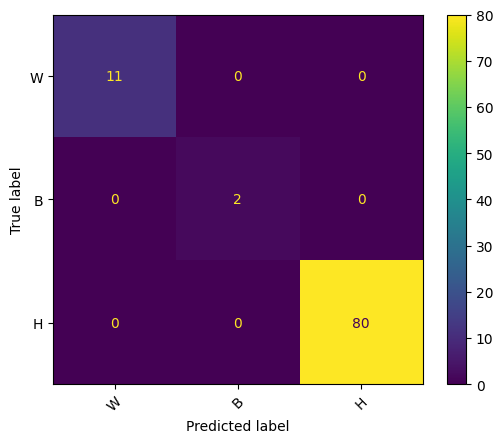

W    80
B    11
S     2
Name: wrapping, dtype: int64


In [34]:
# validating the model to check accuracy visually 

from sklearn import metrics
from matplotlib import pyplot as plt

cm = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels=['W', 'B', 'H'])
cm_display.plot(values_format='d')
plt.xticks(rotation=45)
plt.show()

print(y_test.value_counts())

In [35]:
# verifying precision and recall 

y_test_dummies = pd.get_dummies(y_test)
y_pred_dummies = pd.get_dummies(y_pred)

report_dict = metrics.classification_report(y_test_dummies, y_pred_dummies, target_names=['W','B','H'], output_dict=True)
from sklearn.metrics import classification_report

df_report = pd.DataFrame(report_dict)
df_report

,W,B,H,micro avg,macro avg,weighted avg,samples avg
precision,1.0,1.0,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0,1.0,1.0
support,11.0,2.0,80.0,93.0,93.0,93.0,93.0


In [36]:
# install the needed package to save all of this code to an ONNX file

!pip install skl2onnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import convert_sklearn

# save it all to an ONNX file as 16 features all of type float

initial_type = [('float_input', FloatTensorType([None, 16]))]
onnx = convert_sklearn(clf, initial_types=initial_type)
with open("mummy.onnx", "wb") as f:
    f.write(onnx.SerializeToString())

In [39]:
# download this file to my local computer to put it into our ASP.NET repository

from google.colab import files
files.download('mummy.onnx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>